# STA 141B: Midterm (or Super-Homework if you prefer)

### Worth 300 Points

Fall 2018

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Dannie 

Last Name: Vo

Student ID: 915004803

## Instructions

Please print your answer notebook to pdf (make sure that it is not unnecessarily long due to long output) and submit as the homework solution with your zip file.

For readability you,

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement
- you may add multiple cells between exercise cells

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

## Trans-Atlantic Slave Trade

In this homework, we will uncover some of the numbers behind the Trans-atlantic slave trade (TAST), also known as the middle passage, that brought African slaves to the Americas.  The middle passage is reported to have forcibly migrated over 10 million Africans to the Americas over a roughly 3 century time span.  Many aspects of the TAST is little known by most people, such as the countries that constituted this network of slave ships, the regions from which the slaves were taken, and the number of slaves captured from Africa.

This last number is especially important since the number of slaves taken from Africa can impact other estimates that result from this.  For example, when estimating the population of Africa in a given decade, demographers will use population growth models and more recent census data.  For example, there are roughly X number of people in Africa and such populations tend to grow at rate M.  Then if we want to calculate the population one century ahead then we just apply a simple formula that assumes that the population grows at this rate.  But if the population is being drained by the slave trade, then this number will tend to be underestimated because the growth rate is overestimated.  To account for this models need to take into account this drain on the population.

Throughout this homework you will need to follow the principles of graphical excellence and the grammar of graphics.  **Use only Plotnine for your graphics**, do not use Pyplot, Seaborn, or Plotly since they do not follow closely the grammar of graphics.  Be sure to include titles and necessary contextual captions.

**Warning:** The Trans-Atlantic Slave Trade remains one of the most horrific abuses of human rights in history.  This homework deals with the numbers behind this forced migration, please be aware that this is a sensitive topic for possibly yourself and others.   A suitable amount of respect and seriousness is required when dealing with this data.

**Exercise 1.** The data.

1. Read in the Trans-Atlantic Slave Trade database with Pandas.  Hint: if you use the unix tool `file` you can find that this CSV is encoded with iso-8859-1 character set.  Make sure that all missing values are encoded as NaN.
2. There is lots of missingness in this data, and some of these variables are imputed.  We will be imputing some of these variables ourselves, so delete any variable that ends with 'imp'.
3. Open up the pdf file: TAST_codebook.pdf which is the data dictionary for this and other related datasets.  Many of the variables in the codebook are not in this dataset because it is describing an updated dataset.
4. Create a list where you describe the meaning of the columns of your imported dataframe.  You can group similar columns together when describing their rough meaning, such as ownera,...,ownerp are owners of the slave ships.

Throughout we will disregard all time variables other than year since they are unreliable.

In [378]:
import pandas as pd
import numpy as np
import os
#Exercise 1.1
def read_data(file_directory):
    """
    Function is used to read the data
    Argument: 
        file_directory : the file path
    Return:
        mydata : the dataframe
    """
    mydata = pd.read_csv(file_directory, encoding ='iso-8859-1', na_values = [' '], low_memory=False)
    mydata.replace(' ', np.nan)
    return mydata
mydata = read_data('/Users/dannie/Documents/STA141B/midterm/tastdb-2010.csv')
mydata[0:5]

,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
0,1,1.0,Pastora de Lima,4.0,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.0,Tibério,NaN,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.0,Paquete Real,NaN,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.0,Bom Caminho,NaN,6.0,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1.0,Benigretta,NaN,6.0,NaN,NaN,NaN,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [379]:
#Exercise 1.2 : Drop the dataframe's columns that ends with the string 'imp'
mydata = mydata.drop([a for a in mydata if a.endswith('imp')], 1)
mydata.shape

(34941, 89)

In [3]:
#Exercise 1.3 : Open the pdf file named 'TAST_codebook.pdf' using PyPDF2 package
import PyPDF2
pdfObject = open('TAST_codebook.pdf', 'rb')
TAST_reader = PyPDF2.PdfFileReader(pdfObject)
num_pg = TAST_reader.getNumPages()

Exercise 1.4: <br />
List that describes the meaning of the columns of your imported dataframe:<br />
voyageid : Voyage identification number <br />
evgreen : Voyage i n 1999 CD-ROM <br />
shipname : Name of vessel <br />
national : Country in which ship registered <br />
placcons : Place where vessel constructed <br />
yrcons : Year of vessel’s construction <br />
placreg : Place where vessel registered <br />
yrreg : Year of vessel’s registration <br />
rig : Rig of vessel <br />
tonnage : Tonnage of vessel <br />
tonmod : Tonnage standardized on British measured tons, 1773-1835 <br />
guns : Guns mounted <br />
ownera, ... , ownerp : Owners of venture <br />
fate : Particular outcome of voyage <br />
fate2 : Outcome of voyage for slaves <br />
fate3 : Outcome of voyage if vessel captured <br />
fate4 : Outcome of voyage for owner <br />
resistance : African resistance <br />
plac1tra , plac2tra , plac3tra : First/Second/Third place of slave purchase <br />
npafttra : Port of call before Atlantic crossing <br />
sla1port , adpsale1 , adpsale2 : First/Second/Third place of slave landing <br />
portret : Place at which voyage ended <br />
yearam : Year of arrival at port of disembarkation (imputed) <br />
Date_dep : Date that voyage began <br />
Date_buy : Date that slavepurchase began <br />
Date_leftAfr : Date that vessel left last slaving port <br />
Date_land1 : Date that slaves landed at first place <br />
Date_depam : Date ship left on return voyage   <br />
Date_end : Date when voyage completed <br />
captaina , captainb, captainc : First/Second/Third captain’s name <br />
crew1 : Crew at voyage outset <br />
crew3 : Crew at first landing of slaves <br />
crewdied : Crew died during compl ete voyage <br />
slintend : Slaves intended from first port of purchase <br />
ncar13 , ncar15 , ncar17 : Slaves carried from first/second/third port of purchase <br />
tslavesd : Total slaves on board at departure from last slaving <br />
slaarriv : Total slaves arrived at first port of disembarkation <br />
slas32 , slas36 , slas39 : Slaves disembarked at first/second/third place <br />
menrat7 , womrat7 , boyrat7 , girlrat7 : Percentage of men/woman/boys/girls at departure or arrival <br />
malrat7 , chilrat7: Male/Child ratio at departure or arrival <br />
jamcaspr : Average price of slaves standardized on sterling cash price of prime slaves sold in Jamaica <br />
vymrtrat : Slave mortality rate (slave deaths / slaves embarked) <br />
sourcea , ... , sourcer : Sources of information <br />

**Exercise 2.** First pass at estimating the total number of captives.

1. We will ultimately try to estimate the number of people captured into slavery and forced through the middle passage.  What variable would you use to estimate the total number of captives taken from Africa?  Let me call this variable Var A in this problem statement.   How much of the data for Var A is missing?
2. Create an initial estimate of the total number of captives taken from Africa by assuming that Var A is Missing Completely at Random.  
3. What other variables do you expect to be associated with Var A and why?  Give at least three possibilities.  Which will probably be the most strongly associated with this variable?  (I will be looking for a specific variable to be listed so be sure to think about the most strongly associated one.)

#Exercise 2.1: <br />
We would use the variable 'slaarriv', so let's call this Var A.

In [351]:
mydata['slaarriv'].isna().sum()

16757

So there's a total of 16757 missing values of the data for 'slaarriv'

In [321]:
#Exercise 2.2:
#Assuming the varA is MCAR, I replace the missing NA values with a random value from varA, while the rest stay the same.
varA = mydata['slaarriv']
varA.loc[varA == np.nan] = varA.dropna().sample(len(varA),replace=True)
varA[0:10]

0    290.0
1    223.0
2    350.0
3    342.0
4    516.0
5    515.0
6    204.0
7    374.0
8    345.0
9    478.0
Name: slaarriv, dtype: float64

#Exercise 2.3:
Other variables that are associated with the varA are: <br />
    1/ tslavesd variable because while slaarriv shows the total slaves arrived at first port of disembarkation, tslavesd shows the total slaves on board at departure from last slaving, and their difference can show the number of slaves death or missing. <br />
    2/ fate2 variable because at mydata['fate2'] == 3, this shows the outcome of voyage for slaves where the slaves disembarked in Africa or Europe.  <br />
    3/ Date_dep variables because as this variable shows the date that the voyage began, we can know the year that the voyage started, and from then calculate the number of captives taken based on each year, then get the total number. <br />
The most strongly associated with this varriable is tslavesd because as you can calculate the numbers of captives missing or died, we can from there figure out the number of captives that was taken at the arrival or departure location.  <br />

**Exercise 3.** The flag that the ships flew.

1. We want to understand the trends of the nationality of the slave ships (the flag that they flew under is in the national variable).  Subselect the values of `national` that have more than 100 voyages with that value.  
2. Create a DataFrame that filters out the voyages where `national` does not have one of these values.  You should be retaining voyages with only these most common values.
3. Create a variable, `flag`, that is a string of easily readable names for these values by looking them up in the pdf codebook.
4. Using Plotnine, plot the counts of the voyages by flag as a function of voyage year.  Think about how best to display the count of a voyage by year and then how should you be including the flag variable.
5. In this plot, what are the geometric elements and aesthetic mappings?  What other components of the grammar of graphics are you using?
6. Do you observe any abrupt changes in the patterns of these counts for a given flag?  Investigate the cause for this change (using Google, etc.).

In [122]:
#Exercise 3.1 : Sort mydata that was grouped by 'national' variable, then select the values that has more than 100 voyages.
mydata.groupby('national').size().sort_values()

national
24.0        1
17.0        1
14.0        1
16.0        2
18.0        3
19.0        6
2.0         8
13.0       10
12.0       60
11.0      248
5.0       788
8.0      1237
1.0      1249
9.0      1575
10.0     4069
4.0      5303
7.0     11009
dtype: int64

At 'national' variable = 11,5,8,1,9,10,4,7 ; the dataframe has more than 100 voyages.

In [380]:
#Exercise 3.2 : Create new dataframe that the national variable is equal to 11,5,8,1,9,10,4,7 
a = [11,5,8,1,9,10,4,7]
mydata3 = mydata[mydata['national'].isin(a)]

In [381]:
#Exercise 3.3 : Locate the mydata3.national, then create a new column named flag that indicates its corresponding country flag.
#Also use warnings package to filter out the warnings given.
import warnings
warnings.filterwarnings("ignore")
mydata3['flag'] = ""
mydata3.loc[mydata3.national == 1, 'flag'] = 'Spain'
mydata3.loc[mydata3.national == 4, 'flag'] = 'Portugal'
mydata3.loc[mydata3.national == 5, 'flag'] = 'Brazil'
mydata3.loc[mydata3.national == 7, 'flag'] = 'Great Britain'
mydata3.loc[mydata3.national == 8, 'flag'] = 'Netherlands'
mydata3.loc[mydata3.national == 9, 'flag'] = 'U.S.A.'
mydata3.loc[mydata3.national == 10, 'flag'] = 'France'
mydata3.loc[mydata3.national == 11, 'flag'] = 'Denmark'
#Count the numbers of the voyages when grouped by 'flag' variables.
mydata3.groupby('flag').size()

flag
Brazil             788
Denmark            248
France            4069
Great Britain    11009
Netherlands       1237
Portugal          5303
Spain             1249
U.S.A.            1575
dtype: int64

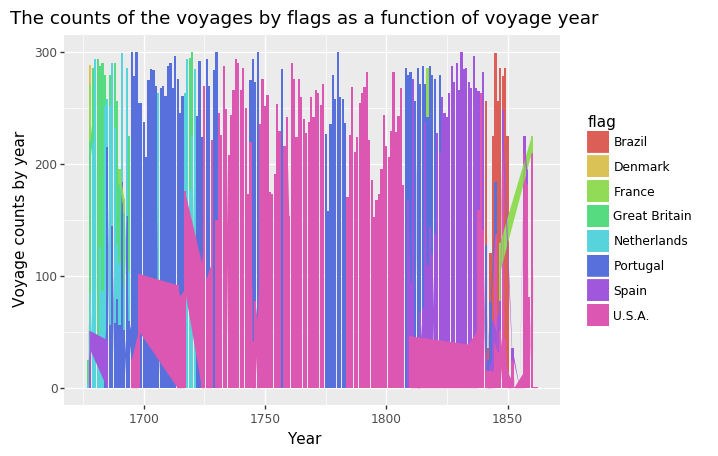

<ggplot: (-9223372029253052279)>


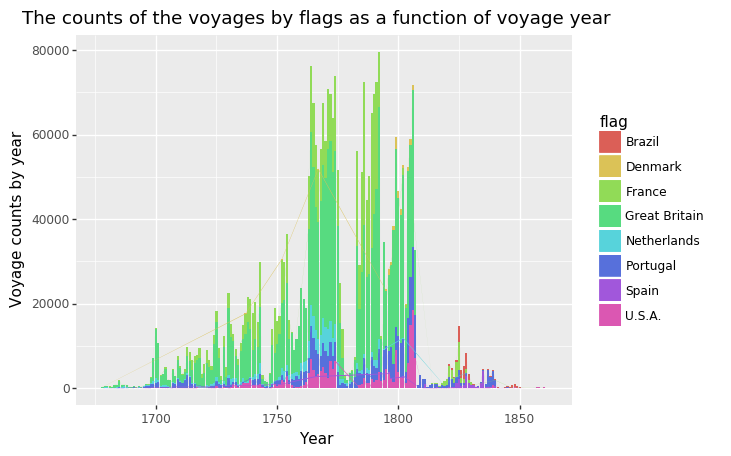

<ggplot: (7587127728)>

In [382]:
#Exercise 3.4:
#Convert 'Date_dep' variable into Datetime format then extract the year into new column named 'year'
#Count the number of voyages by 'year' variable.
type(mydata3['Date_dep'])
mydata3['Date_dep'] = pd.to_datetime(mydata3['Date_dep'], errors='coerce',format ="%m/%d/%Y")
mydata3['year'] = mydata3['Date_dep'].dt.year
mydata3['counts'] = mydata3.year.groupby(mydata3.year).transform('count')
#Import plotnine package then use ggplot to plot the counts of voyages as a function of year based on flag.
#One plot use the ylim from 0 to 300
import plotnine as p9
from plotnine import*
%matplotlib inline
print(p9.ggplot(mydata3, aes(x='year', y='counts', fill='flag')) + p9.ylim(0,300)
 + p9.geoms.geom_col() + p9.geoms.geom_area() + p9.xlab("Year") + p9.ylab("Voyage counts by year") + p9.ggtitle("The counts of the voyages by flags as a function of voyage year")
)
(p9.ggplot(mydata3, aes(x='year', y='counts', fill='flag'))
 + p9.geoms.geom_col() + p9.geoms.geom_area() + p9.xlab("Year") + p9.ylab("Voyage counts by year") + p9.ggtitle("The counts of the voyages by flags as a function of voyage year")
)

#Exercise 3.5:<br />
In this plot, the geometric elements and aesthetic mappings are based on the dataframe(mydata3) year variable as x axis and size as the counts of voyages as y axis.<br />
Other components of the grammar of graphics that I'm using are the geom_col() that shows that columns based on the x axis and the geom_line() to create the line. Besides that, I'm using fill() to fill the color with the dataframe's flag to show to countries that the ship registered. I also use the xlab(), ylab() and ggtitle() to label the axis and the title.<br />

#Exercise 3.6:<br />
The large abrupt changes in the patterns of these counts show clearly for Great Britain, France, and Portugal. Based off Google, this change happened because Britain was the most dominant between 1640 and 1807 when the British slave trade was abolished. <br />
It was not until the opening up of Africa and the slave trade to all English merchants in 1698 that Britain began to become dominant.<br />
Portugal played a leading role in the Atlantic Slave Trade, which involved the mass trade and transportation of slaves from Africa and other parts of the world to the American continent. Slavery was abolished in Portugal in 1761 by the Marquis of Pombal. <br />
France were the third largest slave traders, elevated to that rank by the staggering numbers of Africans delivered to Saint-Domingue (Haiti) in the late eighteenth century.<br />

**Exercise 4.** Looking at some of these ships.

1. Search for the slave ship mentioned in the following wikipedia article: https://en.wikipedia.org/wiki/Brookes_(ship) Hint: Look at all records of ships with 'Brook' in the name and try to match the characteristics to those described.  How many voyages for this ship are in the data (try to exclude ships with the same name)?
2. Create a variable that is True if there was a resistance (like a slave revolt) on the ship.  Plot the density of ships as a function of year with and without revolts and compare these distributions.
3. The movie Amistad was based on a real slave ship and slave uprising.  Read about it here: https://en.wikipedia.org/wiki/La_Amistad  Try to find this ship by searching for it by name and also searching for ships in the same 10 year period as this event with a slave resistance.  If you think you found it describe it, otherwise describe the events of another voyage that you did find.  

In [355]:
#Exercise 4.1:
#Create new dataframe that has the ship name starting with 'Brook'
#Some characteristics that match with the ship in the article
mydata4 = mydata3[mydata3.shipname.str.startswith('Brook',na=False)]
print(len(mydata4))
print(mydata4.flag.value_counts())
print(mydata4.national.value_counts())
print(mydata4.placreg.value_counts())
print(mydata4.year.max())
print(mydata4.year.min())

24
Great Britain    24
Name: flag, dtype: int64
7.0    24
Name: national, dtype: int64
10432.0    18
Name: placreg, dtype: int64
1806.0
1737.0


We can see that there are 24 voyages for this ship with the name Brook/Brooke/Brooks.<br />
Some characteristics that matched the record of this ship is that they all have the same national and flag, which shows that Great Britain is where the ship was registered.<br />
They all had the same place where the vessel registered (10432). And the year where the voyages began fell within 18th century, or to early 19th century.(From 1737 to 1806)<br />

True    480
Name: revolt, dtype: int64


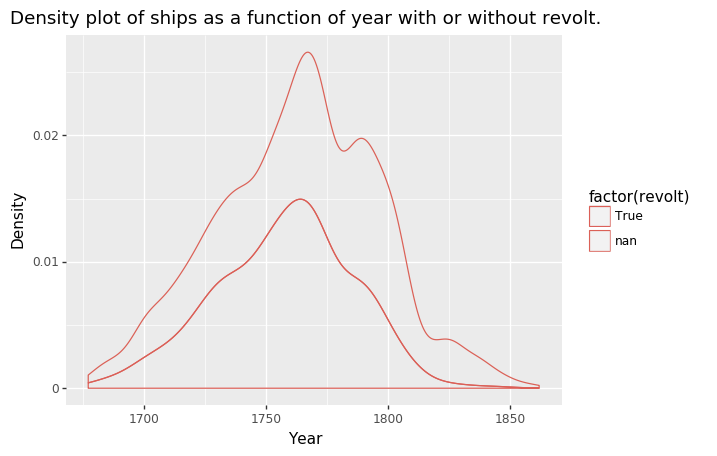

<ggplot: (-9223372029296573836)>

In [383]:
#Exercise 4.2:
#Locate the dataframe's resistance column >0 and assign the new column named revolt to True 
#Count the number of revolt variable that is True
mydata3.loc[mydata3.resistance > 0, 'revolt'] = True
print(mydata3['revolt'].value_counts())
#Make the ggplot that shows the density of the ship based on year with and without revolt using revolt as a factor.
(p9.ggplot(mydata3,aes(x="year")) +p9.geoms.geom_density(aes(color = 'factor(revolt)'), position = 'stack')
 +p9.xlab('Year') + p9.ylab('Density')+ p9.ggtitle('Density plot of ships as a function of year with or without revolt.'))


Based on the density plot above, we can see that the distribution for ships as a function of year with and without revolts has a big difference.<br />
This happens since there were not many voyages with revolts(480), leading to the distribution of the density plot for ships with revolt being much lower than the distribution of ship without revolt.<br />

In [502]:
#Exercise 4.3:
#Search within the mydata3 for the ship name that contains the string 'Amistad'
mydata3[mydata3['shipname'].str.contains('Amistad',na=False)]

,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer,flag,year,counts,revolt
769,774,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Spain,1828.0,91.0,NaN
935,940,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Spain,1829.0,58.0,NaN
959,964,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,51.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Spain,1829.0,58.0,NaN
1178,1196,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,51.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Spain,1829.0,58.0,NaN
1206,1224,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,51.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Spain,1831.0,30.0,NaN
1255,1273,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,51.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Spain,1832.0,19.0,NaN
8225,14622,1.0,Amistad,1.0,NaN,NaN,NaN,NaN,45.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Spain,NaN,NaN,NaN
8258,14656,1.0,Amistad,1.0,NaN,NaN,NaN,NaN,45.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Spain,NaN,NaN,NaN
8341,14742,1.0,Amistad,1.0,NaN,NaN,NaN,NaN,45.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Spain,NaN,NaN,NaN
8441,14844,1.0,Nueva Amistad,1.0,NaN,NaN,NaN,NaN,45.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Spain,NaN,NaN,NaN


In [501]:
#Search within the mydata3 dataframe that has the year from 1829 to 1849 and the revolt variable equals True
mydata3[mydata3['year'].isin(range(1829,1849))][mydata3['revolt'] == True]

,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer,flag,year,counts,revolt
2789,2871,1.0,Virginie,10.0,NaN,NaN,NaN,NaN,1.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,France,1830.0,38.0,True
3248,3433,1.0,Kentucky,9.0,NaN,NaN,NaN,NaN,1.0,272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,U.S.A.,1844.0,15.0,True


Searching by the ship name that contains the word "Amistad", we can find the ship as it's Amistad Habanera, Amistad, and Nueva Amistad. But when searching the ship in the year from 1829 to 1849 with the slave revolt, we can't find it. The ship Virginie and Kentucky show up under these conditions instead. <br />
This is because in the dataframe, the resistance and the revolt for the ship named Amistad were not reported, that's why using the second method to find the ship won't work.<br />
Moreover, some of the voyages for this ship has missing year values, that's another reason why the ship name wasn't shown.<br />

**Exercise 5.** Other patterns.

1. The arrival and departure locations are quite detailed.  Look in the appendix of the codebook for the location codes.  Make a coarser version of both arrival and departure port variables (select just the last departure and first arrival) so that for example,  
```
30000 Caribbean 36100 Martinique 36101 Fort-Royale
```
is just encoded as '3' or Caribbean.
2. Plot the trend of voyages as a function of arrival location.  What trends do you see?
3. Do the same for departure location.
4. Plot the ratio of captives that are men as a function of year.  Include a smoother to describe the over all trend.  Also include in the plot another possible confounding variable.
5. Describe the geoms, aesthetic mappings, and other aspects of the plot.

In [384]:
#Exercise 5.1
#Locate the portret variable and make a coarser version of arrival port for the broad regions.
#Then count how many are under that port_ver region
mydata3.loc[mydata3['portret'].apply(str).str.startswith('1'), 'port_ver'] = '1'
mydata3.loc[mydata3['portret'].apply(str).str.startswith('2'), 'port_ver'] = '2'
mydata3.loc[mydata3['portret'].apply(str).str.startswith('3'), 'port_ver'] = '3'
mydata3.loc[mydata3['portret'].apply(str).str.startswith('4'), 'port_ver'] = '4'
mydata3.loc[mydata3['portret'].apply(str).str.startswith('5'), 'port_ver'] = '5'
mydata3.loc[mydata3['portret'].apply(str).str.startswith('6'), 'port_ver'] = '6'
mydata3.loc[mydata3['portret'].apply(str).str.startswith('8'), 'port_ver'] = '8'
print(mydata3['port_ver'].value_counts())
#Locate the adpsale2 variable and make a coarser version of departure port for the broad regions.
#Then count how many are under that dep_ver region
mydata3.loc[mydata3['adpsale2'].apply(str).str.startswith('2'), 'dep_ver'] = '2'
mydata3.loc[mydata3['adpsale2'].apply(str).str.startswith('3'), 'dep_ver'] = '3'
mydata3.loc[mydata3['adpsale2'].apply(str).str.startswith('4'), 'dep_ver'] = '4'
mydata3.loc[mydata3['adpsale2'].apply(str).str.startswith('5'), 'dep_ver'] = '5'
print(mydata3['dep_ver'].value_counts())

1    9592
2     311
3      90
6      67
4      40
5       5
8       3
Name: port_ver, dtype: int64
3    52
4    10
2     4
5     1
Name: dep_ver, dtype: int64


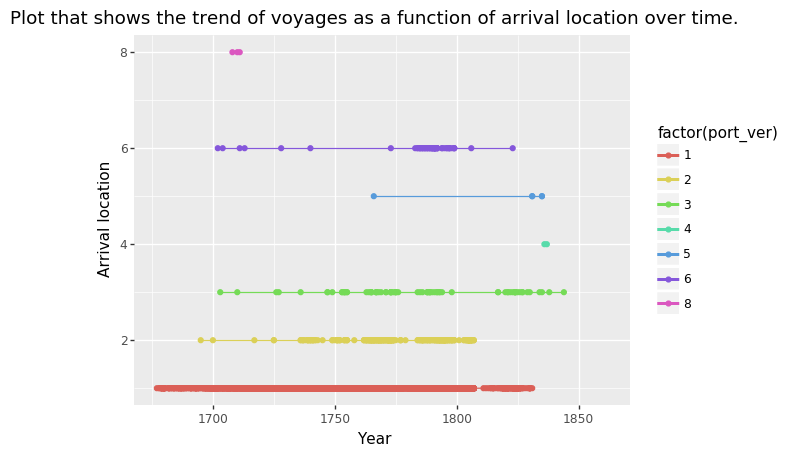

<ggplot: (-9223372029216997467)>

In [162]:
#Exercise 5.2
#Make the ggplot that shows the trend of voyages as a function of arrival location based on the year.
#Using the factor of port_ver to color the dot and line.
(p9.ggplot(mydata3, aes(x = 'year', y = mydata3['port_ver'].replace(np.nan,'0').astype(int), color = 'factor(port_ver)'))+ p9.ylim(1,8) + p9.geoms.geom_line() + p9.geoms.geom_point()+ p9.ggtitle('Plot that shows the trend of voyages as a function of arrival location over time.') + p9.xlab('Year') + p9.ylab('Arrival location'))


From the plot above, there are the most voyages that have the arrival location = '1', which is Europe. The arrival location that has the least voyages in the end is '8', which is Other location besides the 6 broad regions above. Even though '4' seems to be the least on the plot but it's because many data points are missing as their corresponding year at the arrival location = '4' is missing.

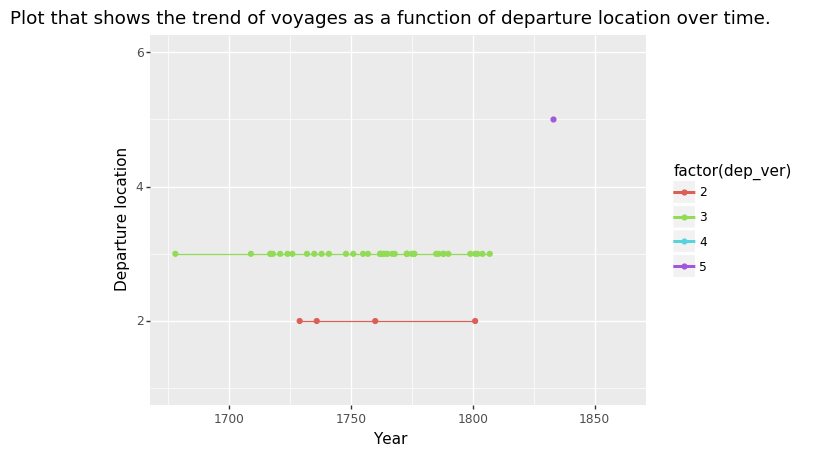

<ggplot: (7592292598)>

In [630]:
#Exercise 5.3
#Make the ggplot that shows the trend of voyages as a function of departure location based on the year.
#Using the factor of dep_ver to color the dot and line.
(p9.ggplot(mydata3, aes(x = 'year', y = mydata3['dep_ver'].replace(np.nan,'0').astype(int), color = 'factor(dep_ver)'))+ p9.ylim(1,6) + p9.geoms.geom_line() + p9.geoms.geom_point()+ p9.ggtitle('Plot that shows the trend of voyages as a function of departure location over time.') + p9.xlab('Year') + p9.ylab('Departure location'))


In [632]:
mydata3[mydata3['dep_ver'] == '4']['year'].value_counts()

Series([], Name: year, dtype: int64)

From the plot above, there are the most voyages that have the departure location = '3', which is Caribbean. The departure location that has the least voyages in the end is '5', which is Brazil.<br />
The reason why the plot above doesn't show the value at departure location = '4' (Supposed to be the blue line) is because its corresponding year is missing (NaN values), so ggplot omits the data points that have missing x-value.<br />

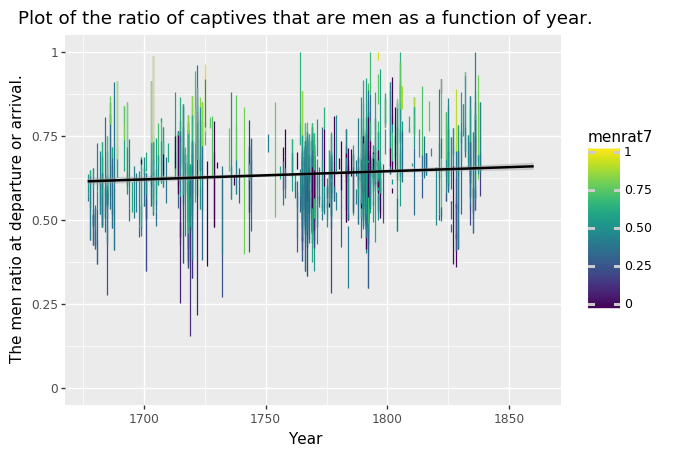

<ggplot: (318434445)>

In [644]:
#Exercise 5.4
#Make the ggplot that shows the ratio of captives that are men as a function of year
#Include a smoother and also color the line using menrat7 variable.
(p9.ggplot(mydata3, aes(x='year', y = 'malrat7', color = 'menrat7')) + p9.geoms.geom_line() +p9.geoms.geom_smooth()  + p9.ggtitle('Plot of the ratio of captives that are men as a function of year.') + p9.xlab('Year') + p9.ylab('The men ratio at departure or arrival.')) 

#Exercise 5.5: <br />
The geom shape is line ggplot where the aesthetic mappings are the year variable as x axis and malrat7 variable as y axis, with the color as menrat7.<br />
From the plot above, we can see that the ratio of captives that are men shows a very high ratio starting 0.4 and up, where the color is used as another possible confounding variable (menrat7) that shows percentage of the men at departure or arrival with about 50% or more. This makes senses as during the Trans Atlantice Slave Trade, the percentage and ratio that men are captives are high.<br />

**Exercise 6.** Estimating total captives count I.

1. Plot the number of slaves at departure from last slaving and the number that arrived at the first port of disembarkation.  
2. Why do these variables concentrate near a line?  Most of the data lies on one side of the line, but a small fraction do not, what could have happened for those that did not?  Separate the data into these two populations.
3. For those voyages where the number of captives decreased (through death), calculate a death rate (ratio of captives that died).  
4. Plot this death rate as a function of year.  Make any appropriate scale transformations, and include a trend line or other smoother.  What is your interpretation?
5. Guess at two possible predictors and create visualizations that give you a sense of their association with the death rate.  Make sure that one of these is categorical, and plot it with the death rate and year so that there are three variables used in the same plot.
6. For these plots, list the geoms, aesthetic mappings, scales, and other notable aspects used.

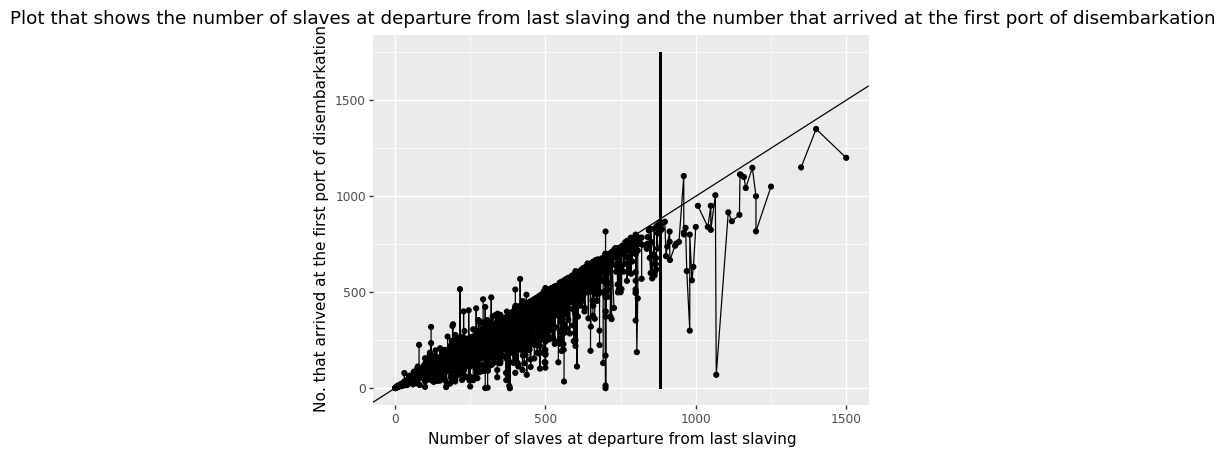

<ggplot: (-9223372029266543167)>

In [659]:
#Exercise 6.1:
#Create a ggplot that shows the number of slaves at departure from last(3rd) slaving and the number that arrived at
#the first port of disembarkation. Make the abline and the line that separates the data into 2 populations.
(p9.ggplot(mydata, aes(x='tslavesd', y = 'slaarriv')) + p9.geoms.geom_line() + p9.geoms.geom_point()
 + p9.geoms.geom_abline(mapping=p9.aes(slope=1,intercept=0)) + p9.geoms.geom_segment(aes(x = 880,y = 0, xend = 880,yend=1750))
 + p9.ggtitle('Plot that shows the number of slaves at departure from last slaving and the number that arrived at the first port of disembarkation')
 + p9.xlab('Number of slaves at departure from last slaving') + p9.ylab('No. that arrived at the first port of disembarkation'))

#Exercise 6.2 : <br />
These variables concentrate near a line because from the last slaving, the number of slaves at departure still arrived at the first port of disembarkation. <br />
The data lies on one side of the line and the small fraction don't because it shows that even though there is a large number of slaves at departure from last slaving, they died on Middle Passage and didn't make it to the first port of disembarkation. <br />
That's why that small fraction has lower values for number that arrived at the first port of disembarkation compared to when number of slaved at departure from last slaving. <br />

In [386]:
#Exercise 6.3:
#Calculate the death rate using two variables tslavesd and slaarriv, and based on the separation of data above
#Subselect the dataframe to only has the value of slaarriv < the value of tslavesd
mydata3['death_rate'] = int()
mydata3['death_rate'] = ((mydata3['tslavesd'] - mydata3['slaarriv'])/mydata3['tslavesd'])[mydata3['slaarriv'] -mydata3['tslavesd'] < 0]

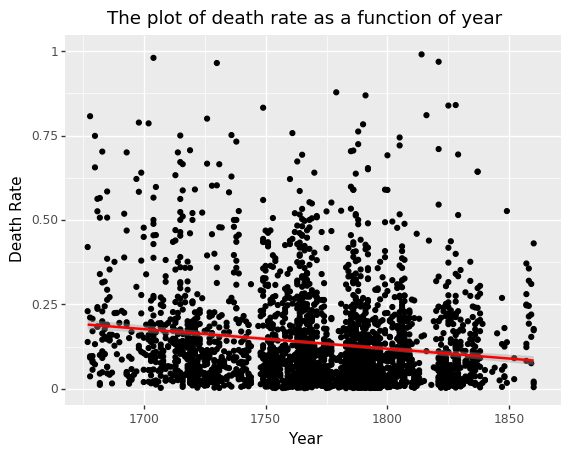

<ggplot: (7587143358)>

In [359]:
#Exercise 6.4
#Create a ggplot that show the death rate as a function of year. Include a smoother in the red color
(p9.ggplot(mydata3,aes(x = 'year', y = 'death_rate')) + p9.geoms.geom_point() + p9.geoms.geom_smooth(color = 'red')
+ p9.xlab('Year') + p9.ylab('Death Rate') + p9.ggtitle('The plot of death rate as a function of year'))

In [387]:
#Locate the flag that has the lowest and highest death rate of the mydata3 dataframe.
print(mydata3.loc[mydata3.death_rate == mydata3.death_rate.min(),'flag'])
print(mydata3.loc[mydata3.death_rate == mydata3.death_rate.max(),'flag'])

16261    France
Name: flag, dtype: object
4726    Spain
Name: flag, dtype: object


Starting from around 1675 till around 1870, we can see that the death rate mostly range from 0 to 0.60. <br />
The voyage that has the lowest death rate was registered in France and the one with the highest death rate was registered in Spain.<br />

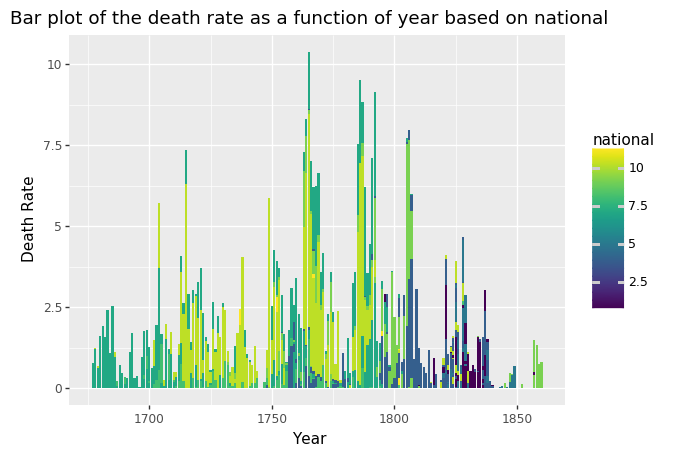

<ggplot: (-9223372029207222661)>

In [332]:
#Exercise 6.5:
#Create the identity bar plot using ggplot that shows the death rate as a function of year using national variable
#to fill to color for each column.
mydata3[~np.isnan(mydata3.death_rate)]
(p9.ggplot(mydata3, aes(x='year',y='death_rate', fill = 'national')) + p9.geoms.geom_bar(stat="identity")
 + p9.xlab('Year') + p9.ylab('Death Rate') + p9.ggtitle('Bar plot of the death rate as a function of year based on national'))

From the bar plot above, we can see that the death rate is significant from 1700 to 1800s for the ship registered in Great Britain, U.S.A and Brazil. 

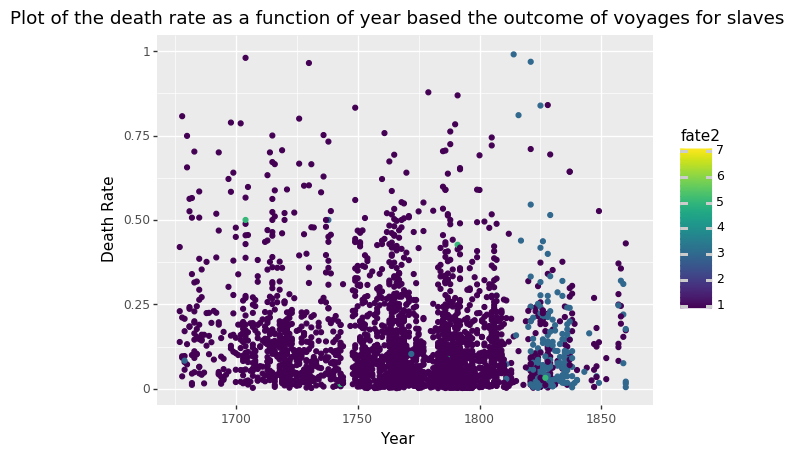

<ggplot: (7565046655)>

In [333]:
#Create the ggplot using ggplot that shows the death rate as a function of year using fate2 (outcome of voyages for slaves)
#to fill to color for each column.
(p9.ggplot(mydata3, aes(x='year',y='death_rate', color = 'fate2')) + p9.geoms.geom_point() 
 + p9.xlab('Year') + p9.ylab('Death Rate') 
 + p9.ggtitle('Plot of the death rate as a function of year based the outcome of voyages for slaves'))

From the plot above, we can see that after 1800s, the death rate based on the outcomes of voyages for slaves shows that it was mostly for the voyages that had slaves disembarked Americas, and also the ones that had slaves disembarked in Africa or Europe.

#Exercise 6.6: <br />
For the first bar plot, the aesthetic mappings are year for x axis and death rate for y axis, while using the national variable to fill the color for identity bar plots as a function of year. Moreover, I use geom_bar() t0 make the bar plot.<br />
For the second scatter plot, the aesthetic mappings are also year for x axis and death rate for y axis, but this time I use fate2 variable(outcomes of voyages for slaves) as a color scale so from there, we can see the death rate of voyages where the slaves disembarked. Moreover, I use geom_points() to show to points on the ggplot.<br />


**Exercise 7.** Estimating total captives count II.

1. Using the variables selected, fit a prediction of death rate using linear regression and some simple transformations/scales.  You do not need to spend time doing automated model selection, just include the most likely predictor or predictors from the previous question.
2. We will impute the number of captives on board at departure, so enumerate the cases for missingness of the variables involved in the prediction.
3. We would like to predict the number of captives on departure from the number that arrived with the following formula,
$$
\textrm{arrived} = \pi (1 - \textrm{death rate}) \cdot (\textrm{captives taken}) + (1- \pi) (\textrm{average increase})
$$
where $\pi$ is the proportion of voyages with no increase in captives, and the average increase is over those that did see an increase. 
For those voyages with captives taken missing and arrived not missing, use the estimated death rate to predict the captives taken.
4. Impute the remainder by predicting the captives taken with the year variable, you can use simple linear regression.
5. With the same formula and method impute the number of captives upon arrival whenever it is missing.
6. Give a new estimate of the predicted total number of captives taken on the middle passage, the total number of deaths, and the overall death rate.  How does this differ from your first estimate obtained by assuming MCAR?

In [388]:
#Exercise 7.1:
#Using LinearRegression package to fit the prediction of death rate.
#Using the national and fate2 variables as the independent variable and the death rate as the dependent variable.
from sklearn.linear_model import LinearRegression
mydata3[mydata3==np.inf]=np.nan
lm = LinearRegression(fit_intercept=True)
lm.fit(mydata3[['national','fate2']][~np.isnan(mydata3.death_rate)], mydata3.death_rate[~np.isnan(mydata3.death_rate)])
#Show the betahat of the linear regression fit
betahat = np.append(lm.intercept_,lm.coef_)
betahat

array([0.11659982, 0.00314707, 0.00212767])

In [415]:
#Predict the death rate , named death_pre using national and fate2 as the independent variables.
mydata3['death_pre'] = np.nan
mydata3['death_pre'][~np.isnan(mydata3.death_rate)] = lm.predict(mydata3[['national','fate2']][~np.isnan(mydata3.death_rate)])
print(mydata3['death_rate'][0:10])
print(mydata3['death_pre'][0:10])

0      0.141082
15     0.141082
94     0.141082
113    0.141082
114    0.141082
115    0.141082
116    0.200000
117    0.141082
118    0.141082
119    0.141082
Name: death_rate, dtype: float64
0      0.131316
15     0.131316
94     0.131316
113    0.150198
114    0.150198
115    0.131316
116    0.150198
117    0.143904
118    0.150198
119    0.150198
Name: death_pre, dtype: float64


In [390]:
#Exercise 7.2:
#Checking the numbers of nan values in the dataframe.
print(mydata3.isnull().sum().head())
#Replacing the nan values with the data's mean at that column.
mydata3 = mydata3.fillna(mydata3.mean())

voyageid        0
evgreen      2471
shipname      659
national        0
placcons    16749
dtype: int64


In [408]:
#Exercise 7.3
#Assign the value to the proportion column (proportion of voyages with no increase in captives)
if (any(mydata3['slaarriv'] - mydata3['tslavesd'] == 0)):
    mydata3['prop'] = 1
else:
    mydata3['prop'] = 0
#Calculate the average_increase column that has values > 0
mydata3['average_increase'] = mydata3['slaarriv'] - mydata3['tslavesd']
mydata3['average_increase'] = mydata3['average_increase'] > 0
#Calculate the captives_taken column on departure before fitting into the linear regression
mydata3['captives_taken'] = np.nan
mydata3['captives_taken'] = (mydata3['tslavesd'] - (1-mydata3['prop'])*mydata3['average_increase'])/(mydata3['prop']*(1 - mydata3['death_rate']))
lin = LinearRegression(fit_intercept=True)
mydata3[mydata3 == np.inf] = np.nan
lin.fit(mydata3[['death_rate','tslavesd']],mydata3['captives_taken'])
#Calculate the betahat for the linear regression
lin_betahat = np.append(lin.intercept_,lin.coef_)
print(lin_betahat)
#Calculate the prediction of captives taken on departure using predict() function on death_rate and tslavesd variables as independent variables.
mydata3['cap_taken_pre'] = lin.predict(mydata3[['death_rate','tslavesd']])
mydata3['cap_taken_pre'] = mydata3['cap_taken_pre'][mydata3['cap_taken_pre'] > 0]
print(mydata3['captives_taken'][0:10])
print(mydata3['cap_taken_pre'][0:10])

[-4.41462408e+02  2.81617083e+03  1.33836845e+00]
0      367.981289
15     367.981289
94     367.981289
113    367.981289
114    367.981289
115    367.981289
116    250.000000
117    367.981289
118    367.981289
119    174.638362
Name: captives_taken, dtype: float64
0      378.861472
15     378.861472
94     378.861472
113    378.861472
114    378.861472
115    378.861472
116    389.445449
117    378.861472
118    378.861472
119    156.604400
Name: cap_taken_pre, dtype: float64


In [412]:
#Exercise 7.4:
#Calculate the remainder at the departure location. Then fit it into the linear regression using year and captives_taken
mydata3['remainder'] = mydata3['captives_taken'] - mydata3['tslavesd']
lin1 = LinearRegression(fit_intercept = True)
lin1.fit(mydata3[['year','captives_taken']], mydata3['remainder'])
#Get the betahat for the linear regression model
lin1_betahat = np.append(lin1.intercept_, lin1.coef_)
print(lin1_betahat)
#Calculate the prediction of remainder using predict() on year and captives_taken variables as independent variables.
mydata3['remainder_pre'] = lin1.predict(mydata3[['year','captives_taken']])
mydata3['remainder_pre'] = mydata3['remainder_pre'][mydata3['remainder_pre']>0]
print(mydata3['remainder'][0:6])
print(mydata3['remainder_pre'][0:6])

[-2.75910140e+02 -1.77469692e-02  9.76838401e-01]
0      51.915605
15     51.915605
94     51.915605
113    51.915605
114    51.915605
115    51.915605
Name: remainder, dtype: float64
0      51.319618
15     51.301871
94     51.284124
113    52.167608
114    52.167608
115    52.167608
Name: remainder_pre, dtype: float64


In [413]:
#Exercise 7.5:
#Calculate the captives taken on arrival (called captives_arriv) based on the formula given.
mydata3['captives_arriv'] = np.nan
mydata3['captives_arriv'] = (mydata3['slaarriv'] - (1-mydata3['prop'])*mydata3['average_increase'])/(mydata3['prop']*(1 - mydata3['death_rate']))
#Fit the linear regression using death_rate and slaarriv variables as independent vars and capties_arriv as dependent var
lin2 = LinearRegression(fit_intercept=True)
mydata3[mydata3 == np.inf] = np.nan
lin2.fit(mydata3[['death_rate','slaarriv']],mydata3['captives_arriv'])
#Get the betahat for the linear regression
lin2_betahat = np.append(lin2.intercept_,lin2.coef_)
print(lin2_betahat)
#Calculate the prediction of the captives taken at arrival (called cap_arriv_pre) using predict() onto death_rate and slaarriv
mydata3['cap_arriv_pre'] = lin2.predict(mydata3[['death_rate','slaarriv']])
mydata3['cap_arriv_pre'] = mydata3['cap_arriv_pre'][mydata3['cap_arriv_pre']>0]
print(mydata3['captives_arriv'][0:10])
print(mydata3['cap_arriv_pre'][0:10])

[-54.87647683 398.49789592   1.15918633]
0      337.634167
15     457.552509
94     278.257124
113    582.127874
114    590.277664
115    308.527773
116    200.000000
117    558.842759
118    286.406914
119    174.638362
Name: captives_arriv, dtype: float64
0      337.508514
15     456.904706
94     278.390011
113    580.937643
114    589.051947
115    308.528855
116    210.292915
117    557.753917
118    286.504315
119    175.222427
Name: cap_arriv_pre, dtype: float64


In [435]:
#Exercise 7.6:
#Find the predicted and the estimated total number of captives taken on the Middle Passage
mydata3['tcap_taken'] = mydata3['captives_taken'] + mydata3['captives_arriv']
mydata3['tcap_taken_pre'] = mydata3['cap_taken_pre'] + mydata3['cap_arriv_pre']
#Find the predict and the estimated total number of deaths based on the death rate prediction and the death rate.
mydata3['total_death_pre'] = mydata3['death_pre']*mydata3['tslavesd']
mydata3['total_death_num'] = mydata3['death_rate']*mydata3['tslavesd']
#Sum of the predicted and the estimated total number of captives taken on the Middle Passage for all voyages
print('The predicted total number of captives taken on Middle Passage for all voyages : %s' %int(mydata3['tcap_taken_pre'].sum()))
print('The estimated total number of captives taken on Middle Passage for all voyages : %s' %int(mydata3['tcap_taken'].sum()))
#Sum of the predicted and estimated total number of deaths for all voyages
print('The predicted total number of deaths for all voyages : %s' %int(mydata3['total_death_pre'].sum()))
print('The estimated total number of deaths for all voyages : %s' %int(mydata3['total_death_num'].sum()))
#The overall predicted and estimated death rate for all voyages
print('The overall predicted death rate for all voyages : %s' %mydata3['death_pre'].mean())
print('The overall estimated death rate for all voyages : %s' %mydata3['death_rate'].mean())
#Finding the differences in the estimated and predicted total number of captives taken and deaths and death rate.
print('The difference in the estimated and predicted total numbers of captives taken for all voyages : %s' %(int(mydata3['tcap_taken'].sum()) - int(mydata3['tcap_taken_pre'].sum())))
print('The difference in the estimated and predicted total numbers of deaths for all voyages : %s' %(int(mydata3['total_death_num'].sum()) - int(mydata3['total_death_pre'].sum())))
print('The difference in the estimated and predicted overall death rate for all voyages : %s' %(mydata3['death_rate'].mean() - mydata3['death_pre'].mean()))

The predicted total number of captives taken on Middle Passage for all voyages : 17506283
The estimated total number of captives taken on Middle Passage for all voyages : 17538832
The predicted total number of deaths for all voyages : 1132845
The estimated total number of deaths for all voyages : 1136023
The overall predicted death rate for all voyages : 0.14090111999783536
The overall estimated death rate for all voyages : 0.1410821869930737
The difference in the estimated and predicted total numbers of captives taken for all voyages : 32549
The difference in the estimated and predicted total numbers of deaths for all voyages : 3178
The difference in the estimated and predicted overall death rate for all voyages : 0.0001810669952383437
